In [2]:
import configparser

# load up the parameter file
parser = configparser.ConfigParser()
parser.read('../params.ini')


# setting paths containg HR5 directories
#Fofd = parser.get('Paths','Fofdir')
output = '/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/'


In [3]:
snapno=1
import h5py 
with h5py.File(f'{output}/clusters{snapno}.hdf5','r') as f:

    # print in scintific notions
    print(f"{f['0'].attrs['mstar']:.3e}")


3.580e+12


In [7]:
import numpy as np
import h5py

cos='CDM'
halo='12'
print(f'Processing halo {halo} for cosmo {cos}')
output = f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output_new/{cos}/halo{halo}/'

# Main code 

for snap in [1]:
    # save fits
    with h5py.File(f"{output}clusters{snap}.hdf5", "r") as f:
        clusID=0
        galids = list(f[f'/{clusID}/'].keys())

        
        galids.remove('ICL')

        mid=-1


        mostmass=0
        totmass=0
        #print("starting",mostmass)
        for gal in galids:
            totmass = f[f'/{clusID}/{gal}'].attrs['mstar'] + totmass
            if f[f'/{clusID}/{gal}'].attrs['mstar']>mostmass:
                mostmass = f[f'/{clusID}/{gal}'].attrs['mstar']
                mid = gal 
        print(mid,np.log10(mostmass))
        totmass = totmass + f[f'/{clusID}/ICL'].attrs['mstar']
        
        # totmass = totmass + f[f'/{clusID}/ICL'].attrs['mstar']
        print(f"Total mass of cluster: {np.log10(totmass)} and cluster mstar: {np.log10(f[f'/{clusID}/'].attrs['mstar'])}")
                

Processing halo 12 for cosmo CDM


86 12.18343795501263
Total mass of cluster: 12.826264646756803 and cluster mstar: 12.826264646756803


In [ ]:
import h5py

cos='CDM'
halo='12'
snap=1
output = f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/{cos}/halo{halo}/'

# save fits
with h5py.File(f"{output}clusters{snap}.hdf5", "r") as f:
        clusID=0
        galids = list(f[f'/{clusID}/'].keys())
        galids.remove('ICL')



galids = [int(i) for i in galids]
for gal in sorted(galids):
        i=0
        for output in [f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/{cos}/halo{halo}/',\
                       f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output_new/{cos}/halo{halo}/']:

            with h5py.File(f"{output}clusters{snap}.hdf5", "r") as f:
                clusID=0
                Mtot=f[f'/{clusID}/'].attrs['mtot']
                if i==0:
                    M1=f[f'/{clusID}/{gal}'].attrs['mstar']
                    MT1=f[f'/{clusID}/{gal}'].attrs['mtot']
                if i==1:
                    M2=f[f'/{clusID}/{gal}'].attrs['mstar']
                    MT2=f[f'/{clusID}/{gal}'].attrs['mtot']
                i=i+1
        
        if M1!=M2:
            print(f"Different galid {gal}, Mstar,Mtot: Output {M1:.3e},{MT1:.3e} Output_new {M2:.3e},{MT2:.3e}")
        else:
            print(f"Same galid {gal}, Mstar,Mtot: Output {M1:.3e},{MT1:.3e} Output_new {M2:.3e},{MT2:.3e}")


Same galid 0, Mstar,Mtot: Output 1.110e+08,6.261e+09 Output_new 1.110e+08,6.261e+09
Same galid 1, Mstar,Mtot: Output 1.057e+08,1.367e+09 Output_new 1.057e+08,1.367e+09
Same galid 2, Mstar,Mtot: Output 2.340e+07,7.315e+08 Output_new 2.340e+07,7.315e+08
Same galid 3, Mstar,Mtot: Output 0.000e+00,1.255e+08 Output_new 0.000e+00,1.255e+08
Same galid 4, Mstar,Mtot: Output 7.883e+07,8.081e+09 Output_new 7.883e+07,8.081e+09
Same galid 5, Mstar,Mtot: Output 2.831e+07,1.639e+09 Output_new 2.831e+07,1.639e+09
Same galid 6, Mstar,Mtot: Output 4.464e+07,6.848e+08 Output_new 4.464e+07,6.848e+08
Same galid 7, Mstar,Mtot: Output 0.000e+00,1.940e+07 Output_new 0.000e+00,1.940e+07
Same galid 8, Mstar,Mtot: Output 4.718e+07,2.181e+09 Output_new 4.718e+07,2.181e+09
Same galid 9, Mstar,Mtot: Output 0.000e+00,3.880e+07 Output_new 0.000e+00,3.880e+07
Same galid 10, Mstar,Mtot: Output 6.664e+07,9.689e+09 Output_new 6.664e+07,9.689e+09
Same galid 11, Mstar,Mtot: Output 1.583e+08,3.582e+09 Output_new 1.583e+08,

In [15]:
import h5py

cos='SIDM'
halo='05'
snap=1
output = f'./'

# save fits
with h5py.File(f"./clusters{snap}_old.hdf5", "r") as f:
        clusID=0
        galids = list(f[f'/{clusID}/'].keys())
        galids.remove('ICL')



galids = [int(i) for i in galids]
print(len(galids))
for gal in sorted(galids):
        i=0
        for out in ['new']:

            with h5py.File(f"{output}clusters{snap}_{out}.hdf5", "r") as f:
                clusID=0
                if i==0:
                    M1=f[f'/{clusID}/{gal}'].attrs['mstar']
                    MT1=f[f'/{clusID}/{gal}'].attrs['mtot']
                if i==1:
                    M2=f[f'/{clusID}/{gal}'].attrs['mstar']
                    MT2=f[f'/{clusID}/{gal}'].attrs['mtot']
            i=i+1
        
        if M1!=M2:
            print(f"Different galid {gal}, Mstar,Mtot: Output {M1:.3e},{MT1:.3e} Output_new {M2:.3e},{MT2:.3e}")
        else:
            print(f"Same galid {gal}, Mstar,Mtot: Output {M1:.3e},{MT1:.3e} Output_new {M2:.3e},{MT2:.3e}")


367
Different galid 0, Mstar,Mtot: Output 8.882e+07,5.738e+08 Output_new 5.708e+07,3.229e+09
Different galid 1, Mstar,Mtot: Output 3.567e+07,3.334e+09 Output_new 5.708e+07,3.229e+09
Different galid 2, Mstar,Mtot: Output 1.084e+07,9.323e+08 Output_new 5.708e+07,3.229e+09
Different galid 3, Mstar,Mtot: Output 1.401e+07,8.385e+08 Output_new 5.708e+07,3.229e+09
Different galid 4, Mstar,Mtot: Output 4.718e+07,1.157e+10 Output_new 5.708e+07,3.229e+09
Different galid 5, Mstar,Mtot: Output 8.940e+06,1.932e+08 Output_new 5.708e+07,3.229e+09
Different galid 6, Mstar,Mtot: Output 1.636e+07,5.128e+09 Output_new 5.708e+07,3.229e+09
Different galid 7, Mstar,Mtot: Output 2.679e+07,7.418e+09 Output_new 5.708e+07,3.229e+09
Different galid 8, Mstar,Mtot: Output 1.188e+08,2.111e+10 Output_new 5.708e+07,3.229e+09
Different galid 9, Mstar,Mtot: Output 4.413e+07,7.164e+09 Output_new 5.708e+07,3.229e+09
Different galid 10, Mstar,Mtot: Output 3.987e+07,1.475e+09 Output_new 5.708e+07,3.229e+09
Different galid 

Different galid 111, Mstar,Mtot: Output 6.850e+07,1.073e+10 Output_new 5.708e+07,3.229e+09
Different galid 112, Mstar,Mtot: Output 2.035e+10,1.869e+11 Output_new 5.708e+07,3.229e+09
Different galid 113, Mstar,Mtot: Output 3.492e+08,8.827e+09 Output_new 5.708e+07,3.229e+09
Different galid 114, Mstar,Mtot: Output 0.000e+00,1.917e+08 Output_new 5.708e+07,3.229e+09
Different galid 115, Mstar,Mtot: Output 2.811e+10,1.217e+11 Output_new 5.708e+07,3.229e+09
Different galid 116, Mstar,Mtot: Output 0.000e+00,1.155e+07 Output_new 5.708e+07,3.229e+09
Different galid 117, Mstar,Mtot: Output 6.591e+10,6.885e+10 Output_new 5.708e+07,3.229e+09
Different galid 118, Mstar,Mtot: Output 1.424e+09,1.896e+10 Output_new 5.708e+07,3.229e+09
Different galid 119, Mstar,Mtot: Output 0.000e+00,2.129e+07 Output_new 5.708e+07,3.229e+09
Different galid 120, Mstar,Mtot: Output 2.195e+08,2.231e+10 Output_new 5.708e+07,3.229e+09
Different galid 121, Mstar,Mtot: Output 6.492e+07,2.306e+09 Output_new 5.708e+07,3.229e+09

KeyError: "Unable to open object (object '366' doesn't exist)"

In [2]:
import numpy as np
import h5py

cos='SIDM'
halo='05'
print(f'Processing halo {halo} for cosmo {cos}')
output = f'./'

# Main code 

for snap in [1]:
    # save fits
    with h5py.File(f"{output}clusters{snap}_old.hdf5", "r") as f:
        clusID=0
        galids = list(f[f'/{clusID}/'].keys())

        
        # galids.remove('ICL')

        mid=-1


        mostmass=0
        totmass=0
        #print("starting",mostmass)
        for gal in galids:
            totmass = f[f'/{clusID}/{gal}'].attrs['mstar'] + totmass
        #     if f[f'/{clusID}/{gal}'].attrs['mstar']>mostmass:
        #         mostmass = f[f'/{clusID}/{gal}'].attrs['mstar']
        #         mid = gal 
        # print(mid,np.log10(mostmass))
        # totmass = totmass + f[f'/{clusID}/ICL'].attrs['mstar']
        
        # totmass = totmass + f[f'/{clusID}/ICL'].attrs['mstar']
        print(f"Total mass of cluster: {np.log10(totmass)} and cluster mstar: {np.log10(f[f'/{clusID}/'].attrs['mstar'])}")
                

Processing halo 05 for cosmo SIDM
Total mass of cluster: 12.565872446173445 and cluster mstar: 12.565872446173445


In [12]:
from astropy.io import fits

# Open the FITS file
with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits') as hdulist:

    
    # Print the structure of the FITS file
    print(hdulist.info())

    # Iterate through each HDU
    for i, hdu in enumerate(hdulist):
        print(f"\nHDU {i}:")
        print(f"Type: {type(hdu)}")
        
        # Check if the HDU contains image data
        if hasattr(hdu, 'data') and hdu.data is not None:
            print(f"Image shape: {hdu.data.shape}")
            print(f"Data type: {hdu.data.dtype}")
            
            # Check if there is a header
            if hasattr(hdu, 'header'):
                print(f"Header information:")
                print(repr(hdu.header))


Filename: /scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/CDM/halo05/0/1_0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ALL_STAR_DENSITY_X    1 PrimaryHDU      30   (1024, 1024)   float64   
  1  BCG_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  2  REST_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  3  ICL_STAR_DENSITY_X    1 ImageHDU        31   (1024, 1024)   float64   
  4  ALL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  5  BCG_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  6  REST_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  7  ICL_STAR_DENSITY_Y    1 ImageHDU        31   (1024, 1024)   float64   
  8  ALL_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
  9  BCG_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 10  REST_STAR_DENSITY_Z    1 ImageHDU        31   (1024, 1024)   float64   
 11

## Mass from FITS file

In [5]:
from astropy.io import fits
import numpy as np
import CEAGLE_module as ceg
import h5py

cos='SIDM'
halo='05'
snap='1'

output = f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/{cos}/halo{halo}/'
# clusid = 0
# clus = ceg.Cluster(output,1,clusid)
# gal = clus.get_alldat_gal(clus.bcgid)

# # print all attributes of gal
# print(f"BCG stellar mass: {gal.gal_mstar:.3e} Msun")

# output = f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output_new/{cos}/halo{halo}/'
# clusid = 0
# clus = ceg.Cluster(output,1,clusid)
# gal = clus.get_alldat_gal(clus.bcgid)
# print(f"BCG stellar mass: {gal.gal_mstar:.3e} Msun")

# Open the FITS file
with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output_new/{cos}/halo{halo}/0/{snap}_0.fits') as hdulist:

    # Access a specific HDU by its name
    hdu_name = 'All_STAR_DENSITY_X'  # Replace with the name of the HDU you want to access
    hdu = hdulist[hdu_name]
    data = hdu.data
    header = hdu.header
    
        
    # Extract the scale information
    scale_str = header['SCALE']  
    
    scale_numerator, unit = scale_str.split(' ')
    scale_value = float(scale_numerator.split('/')[0])/float(scale_numerator.split('/')[1]) 
  
    # # Convert scale to kpc^2 per pixel
    scale_kpc_per_pixel = (scale_value) * 1000  # Convert Mpc to kpc
    pixel_area_kpc2 = scale_kpc_per_pixel**2

    # Calculate total mass
    total_mass = np.nansum(data) * pixel_area_kpc2  # Msun

    print(f"Total stellar mass: {np.log10(total_mass)} Msun")

Total stellar mass: 12.635417570462158 Msun


In [4]:
output = f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output_new/{cos}/halo{halo}/'
clusid = 0
clus = ceg.Cluster(output,1,clusid)
print(f"Total stellar mass: {np.log10(clus.clus_mstar)} Msun")

Total stellar mass: 12.565872446173445 Msun


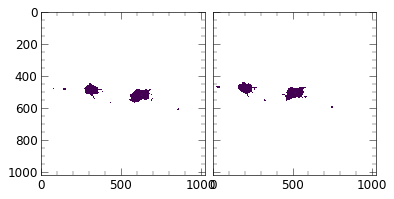

: 

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

plt.style.use('../../paper_style.mplstyle')


fig,ax = plt.subplots(1,2,sharey=True)

with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/SIDM/halo05/0/1_0.fits') as hdulist:

    ax[0].imshow(hdulist[0].data)

with fits.open(f'/scratch/ankitsingh/Galaxy_catalogs/ICL_data/CEAGLE/Data/Output/SIDM/halo05/0/1_0_r200_bcg.fits') as hdulist:

    ax[1].imshow(hdulist[0].data)

In [1]:
import CEAGLE_module as ceg
clusid = 0
clus = ceg.Cluster(1,clusid)
gal = clus.get_alldat_gal(clus.bcgid)


/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [ ]:
import matplotlib.pyplot as plt


import numpy as np

import CEAGLE_module as ceg
clusid = 0
clus = ceg.Cluster(1,clusid)
gal = clus.get_alldat_gal(clus.bcgid)

ds = gal.get_yt_dataset()

/home/ankitsingh/miniconda3/envs/ICL/lib/python3.7/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


Getting the gas particles
Getting the star particles
Getting the dm particles
Getting the gas particles
Getting the star particles
Getting the dm particles
Getting the gas particles
Getting the star particles
Getting the dm particles
Processing particle type gas
Processing particle type star
Processing particle type dm
-1.0155596304252867 0.8882863729004384
-1.1714482534471244 1.2106280347252323
-1.1015215001209526 1.1524413211495812
-0.12228897706836506 0.16701134867889778
-0.2334225649669861 0.23816765462515832
-0.1678034649946767 0.17174034616709832
-1.011548418252687 0.8844998579825187
-1.1758911368931422 1.2084487645249737
-1.099493106207774 1.1553303867983686


Getting the gas particles


Getting the star particles
Getting the dm particles
Getting the gas particles
Getting the star particles
Getting the dm particles
Processing particle type gas
Processing particle type star
Processing particle type dm
-1.0155596304252867 0.8882863729004384
-1.1714482534471244 1.2106280347252323
-1.1015215001209526 1.1524413211495812
-0.12228897706836506 0.16701134867889778
-0.2334225649669861 0.23816765462515832
-0.1678034649946767 0.17174034616709832
-1.011548418252687 0.8844998579825187
-1.1758911368931422 1.2084487645249737
-1.099493106207774 1.1553303867983686
